Rocket equations
=================




So, the well known rocket equation, relating the $\Delta v$ induced by a rocket burn as a function of the exhaust velocity, $v_e$, and the initial and final masses of the rocket (including any remaining fuel and payload), $m_f$ and $m_i$, comes from observing that

$$\Delta v = \int_{m_f}^{m_i} \frac{v_e}{m} dm = v_e \ln{\frac{m_i}{m_f}} $$

Energy density of fuel
=================

This means that for fixed $v_e$, the initial mass of a rocket grows exponentially with the $\Delta v$ desired.  Which is an undesirable state of things.

A natural inclination is to try to get around this by increasing $v_e$.

But that has limitations as well.

Every imaginable fuel (even matter-antimatter) has some ratio of energy stored per unit mass.  Call this $R_e$

Once the energy is extracted from a piece of fuel, the remaining mass of the burnt fuel has little use except to shoot it out the back of the rocket as reaction mass (or, worse, carry along with the rocket as dead weight).

This gives us, at least for non-relativistic exhaust speeds, and negligible loss of mass through conversion to energy

$$ R_e (m_i - m_f) = \int_{m_f}^{m_i} \frac{1}{2} v_e^2 dm $$

Tying it together
===============

This is all well and good, and gives us an upper bound for $v_e$ for chemical rockets that have a constant exhaust velocity.  You can work it all out, tie it together, and figure out why constant $v_e$ chemical rockets have to be giant (and mostly consist of fuel) to achieve spaceflight $\Delta v$

But one can do more interesting things with these equations.

What if
================

What if we could independently schedule the release of spent fuel mass and spent fuel energy?
What if we could store part of the energy from burning a piece of fuel, and use it, later, to send a different piece of exhaust at a higher $v_e$ when it is more optimal to do so?  Conversely, what if we could save some of the spent fuel exhaust from burning a piece of fuel, impart all the energy onto a smaller piece of fuel exhaust, and launch that reaction mass later?

In short, what if we could make $v_e(m)$ a function of the mass remaining ($m$) ?

Those equations then become

$$ R_e (m_i - m_f) = \int_{m_f}^{m_i} \frac{1}{2} v_e^2(m) dm $$

which, if you notice, for fixed $m_i$, $m_f$ and $R_e$, constrain the inner product of $v_e(m)$ with itself.

And, subject to that, you, ideally, want to maximize

$$\Delta v = \int_{m_f}^{m_i} \frac{v_e(m)}{m} dm $$

But that's just the inner product of $v_e(m)$ with $\frac{1}{m}$ !

In short, the optimal schedule for $v_e$ as a function of the mass remaining, $m$, is to make $v_e$ proportional to the reciprocal of the total spacecraft remaining mass.

Let's solve it!!!
===============

Start with the first equation,

$$ R_e (m_i - m_f) = \int_{m_f}^{m_i} \frac{1}{2} v_e^2(m) dm $$

And assume $v_e(m) = \frac{k}{m}$ for some unknown $k$ that we're trying to solve for

$$ R_e (m_i - m_f) = \int_{m_f}^{m_i} \frac{1}{2} \frac{k^2}{m^2} dm  = \frac{k^2}{2} ( \frac{1}{m_f} - \frac{1}{m_i})$$

Or

$$k = \sqrt{ \frac{2 R_e (m_i - m_f)}{\frac{1}{m_f} - \frac{1}{m_i}}}$$



Which simplifies to $k = \sqrt{ 2 R_e m_i m_f}$

Now we want to solve

$$\Delta v = \int_{m_f}^{m_i} \frac{v_e(m)}{m} dm $$


with $v_e(m) = \frac{k}{m}$, which gets us

$$\Delta v = \int_{m_f}^{m_i} \frac{k}{m^2} dm = k ( \frac{1}{m_f} - \frac{1}{m_i})$$

$$\Delta v = k ( \frac{1}{m_f} - \frac{1}{m_i}) = k \frac{m_i - m_f}{m_i m_f}$$

$$ \Delta v = \sqrt{2 R_e m_i m_f} \frac{m_i - m_f}{m_i m_f} = (m_i - m_f) \sqrt{\frac{2 R_e} {m_i m_f}}$$

This looks comforting because we could multiply all the masses by, say, 10, and the $\Delta v$ would remain the same, just as it does with the classic rocket equation for constant $v_e$.  Lets work that one out next

In [1]:
from math import sqrt, log, exp

In [2]:
## Just for the heck of it, let's write a python function that computes delta v
## for an ideal-scheduled rocket as a function of m_f, m_i and Re

def deltav_optimal(m_i, m_f, Re, m_curr = None):
    """
    m_curr allows us to plan a burn schedule for a certain amount of fuel, and calculate velocity
    at any point along that burn trajectory
    """
    if m_curr is None:
        m_curr = m_f
    k = sqrt(2.0 * Re * m_i * m_f)
    return k * (1 / m_curr - 1/m_i)

Expression for constant exhaust velocity rocket
============================

Let's work this out for a constant velocity exhaust rocket.


Recall from earlier that 

$$ \Delta v = v_e \log{(\frac{m_i}{m_f})} $$ 

Now we just need to find $v_e$

We have

$$ R_e (m_i - m_f) = \int_{m_f}^{m_i} \frac{1}{2} v_e^2(m) dm $$

and, since $v_e$ is a constant, we just have

$$ R_e (m_i - m_f) = \frac{1}{2} v_e^2 (m_i - m_f) $$

or

$$ v_e = \sqrt{2 R_e} $$

That gives us 

$$ \Delta v = (\sqrt{2 R_e}) \log{(\frac{m_i}{m_f})} $$

In [3]:
## And we can calculate that in python too

def deltav_constant(m_i, m_f, Re, m_curr = None):
    """
    m_curr allows us to plan a burn schedule for a certain amount of fuel, and calculate velocity
    at any point along that burn trajectory
    """
    if m_curr is None:
        m_curr = m_f
    v_e = sqrt(2.0 * Re)
    return v_e * log(m_i / m_curr)

In [4]:
# Now that we have those calculations, let's plot velocity vs mass spent for both kinds of rockets
from matplotlib import pyplot as plt

Text(0, 0.5, 'Delta v')

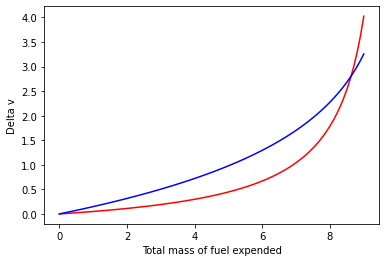

In [5]:
plt.plot([0.1 * i for i in range(91)], [deltav_optimal(10.0, 1.0, 1.0, 10.0 - 0.1 * i) for i in range(91)], 'r-')
plt.plot([0.1 * i for i in range(91)], [deltav_constant(10.0, 1.0, 1.0, 10.0 - 0.1 * i) for i in range(91)], 'b-')
plt.xlabel("Total mass of fuel expended")
plt.ylabel("Delta v")

Text(0, 0.5, 'Delta v')

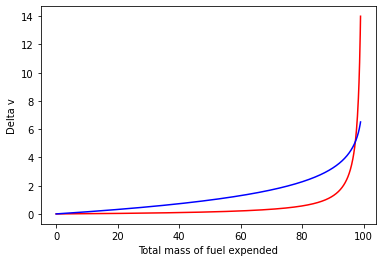

In [6]:
## That's for a fuel-payload ratio of 10 to 1.  What happens when it's 100 to 1?

plt.plot([0.1 * i for i in range(991)], [deltav_optimal(100.0, 1.0, 1.0, 100.0 - 0.1 * i) for i in range(991)], 'r-')
plt.plot([0.1 * i for i in range(991)], [deltav_constant(100.0, 1.0, 1.0, 100.0 - 0.1 * i) for i in range(991)], 'b-')
plt.xlabel("Total mass of fuel expended")
plt.ylabel("Delta v")

[10092.208262381673, 9072.152221635844]


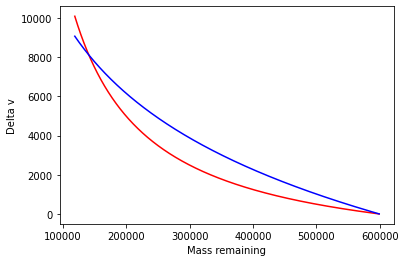

In [7]:
## Let's try with some physically plausible numbers

h_energy_density = 141.8e6 / 9  # 141.8e6 is from wikipedia, dividing by 9 is because we need to carry oxygen
# we need to carry 16 mass for every 2 mass of H2

saturn_v_booster_mass = 2.3e6
saturn_v_stage_2_mass = 0.48e6
saturn_v_stage_3_mass = 0.119e6

m_i_sv = saturn_v_stage_3_mass + saturn_v_stage_2_mass
m_f_sv = saturn_v_stage_3_mass

masses_sv = [m_f_sv + 0.001 * i * saturn_v_stage_2_mass for i in range(1001)]

plt.plot(masses_sv, [deltav_optimal(m_i_sv, m_f_sv, h_energy_density, m) for m in masses_sv], 'r-')
plt.plot(masses_sv, [deltav_constant(m_i_sv, m_f_sv, h_energy_density, m) for m in masses_sv], 'b-')
plt.xlabel("Mass remaining")
plt.ylabel("Delta v")
print(str([deltav_optimal(m_i_sv, m_f_sv, h_energy_density), deltav_constant(m_i_sv, m_f_sv, h_energy_density)]))

So under real-world plausible mass ratios, optimal vs constant $v_e$ doesn't matter *that* much!

But an extra $km/s$ would still be useful if it could be achieved.

Later we'll look into how feasible that might be, and how much energy we'd need to store in a rocketry scenario like this.

But first we'll compare these simulation numbers to the actual $\Delta v$ from the rocket this example was based on.

In [8]:
# Let's compare to the actual Saturn-V second stage delta v
vf_kmh = 25181
vi_ms = 2756
delta_v_m_per_s = (1000/3600) * vf_kmh - vi_ms
print("Achieved delta v from actual Saturn V stage 2 was " + str(delta_v_m_per_s))

Achieved delta v from actual Saturn V stage 2 was 4238.722222222223


Huh, so our upper bound from the raw Tsiolkovsky equation wasn't that bad.

Comparison to billiard style collisions
-----------------------------

A natural question that might arise now is how this "optimal" schedule for $v_e(m)$ as a function of the mass remaining compares to a hypothetical "billiard ball" collision, in which the entire exhaust is ejected at once as a rigid body in a way that preserves total system momentum, and adds a kinetic energy of $R_e (m_i - m_f)$.

We calculate that below.

Here we let $v_r$ be the final velocity magnitude of the rocket, and abuse notation to use $v_e$ to denote the final velocity magnitude of the ejected exhaust (as if it were a rigid body)

Total energy in terms of $R_e$ and masses

$$ E = R_e (m_i - m_f) $$

Momentum balance

$$ m_f v_r = (m_i - m_f) v_e $$

Kinetic energy equals total energy

$$ \frac{1}{2} (m_i - m_f) v_e^2 + \frac{1}{2} m_f v_r^2 = R_e (m_i - m_f) $$

Gather terms by masses

$$ m_f v_r^2 = (m_i - m_f) (2 R_e - v_e^2) $$

$$ v_r = \sqrt{\frac{m_i - m_f}{m_f}} \sqrt{ 2 R_e - v_e^2} $$

which we can plug back in to the momentum balance equation for

$$ (m_i - m_f) v_e = m_f \sqrt{\frac{m_i - m_f}{m_f}} \sqrt{ 2 R_e - v_e^2} $$


$$ \sqrt{\frac{m_i - m_f}{m_f}} v_e =  \sqrt{ 2 R_e - v_e^2} $$

Well, now we have to square things again to get anything done

$$ (\frac{m_i - m_f}{m_f}) v_e^2 + v_e^2 = 2 R_e $$

$$ (\frac{m_i}{m_f}) v_e^2 = 2 R_e $$

$$ v_e = \sqrt{\frac{2 R_e m_f}{m_i}} $$

$$ v_r = \frac{m_i - m_f}{m_f} \sqrt{\frac{2 R_e m_f}{m_i}} $$

$$ v_r = (m_i - m_f) \sqrt{\frac{2 R_e }{m_i m_f}} $$

which is exactly what our optimal schedule of releasing mass and energy gave us.

Well, that's both relieving, and somewhat disappointing.  It ties everything together in a satisfying way, but raises the question of whether starting from the billiard style collision would have been a better way to reach this optimal schedule

We also have an expression for $v_e(m)$ in terms of the remaining mass amd $v_r(m)$.  What happens if we subtract these?

Recall

$$ v_e(m) = \frac{\sqrt{ 2 R_e m_i m_f}}{m} $$

$$ v_r(m) = \sqrt{ 2 R_e m_i m_f} (\frac{1}{m} - \frac{1}{m_i} ) $$

If we subtract these we get

$$ v_e(m) - v_r(m) = \frac{\sqrt{2 R_e m_i m_f}}{m_i} = \sqrt{\frac{2 R_e m_f}{m_i}} $$

which is exactly the exhaust velocity from our rigid-body billiard collision thought experiment.

This, also, makes perfect sense.

How *much* energy does this require storing?
=====================================



Well, the amount of energy released when the mass remaining is $m_r$ is $ R_e (m_i - m_r) $

At the same time, the amount released via exhaust is

$$ \int_{m_r}^{m_i} \frac{1}{2} v_e(m)^2 dm $$

where

$$ v_e(m) = \frac{\sqrt{ 2 R_e m_i m_f}}{m} $$


which gives us

$$ \int_{m_r}^{m_i} \frac{1}{2} \frac{2 R_e m_i m_f}{m^2} = \int_{m_r}^{m_i} \frac{R_e m_i m_f}{m^2} dm $$

or

$$ (R_e m_i m_f) ( \frac{1}{m_r} - \frac{1}{m_i}) $$

This makes the difference between energy released and energy expended 

$$ R_e ( (m_i - m_r) - m_i m_f ( \frac{1}{m_r} - \frac{1}{m_i})) $$

or

$$ R_e ( (m_i - m_r) - (\frac{m_i m_f}{m_r} - m_f) = R_e (m_i + m_f - m_r - \frac{m_i m_f}{m_r}) $$

In [9]:
def energy_stored_optimal(m_i, m_f, Re, m_curr = None):
    """
    m_curr allows us to plan a burn schedule for a certain amount of fuel, and calculate velocity
    at any point along that burn trajectory
    """
    if m_curr is None:
        m_curr = m_f
    return Re * (m_i + m_f - m_curr - (m_i * m_f) / m_curr)

Text(0, 0.5, 'Energy stored (Joules)')

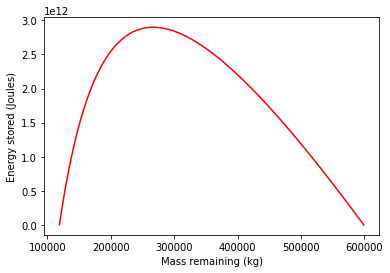

In [10]:
### Now let's plot this for our saturn V second stage


plt.plot(masses_sv, [energy_stored_optimal(m_i_sv, m_f_sv, h_energy_density, m) for m in masses_sv], 'r-')
plt.xlabel("Mass remaining (kg)")
plt.ylabel("Energy stored (Joules)")


Wow, that's a lot of energy!  What happens if we assume all of it is stored as heat in the remaining fuel?

We can look at what the resulting Joules/g stored heat energy would be (bearing in mind that Oxygen has a specific heat of very close to 1 Joule / (g degree Kelvin), although I am completely unsure of what kind of range that number holds over).

Text(0, 0.5, 'Joules / g stored energy per unit remaining mass')

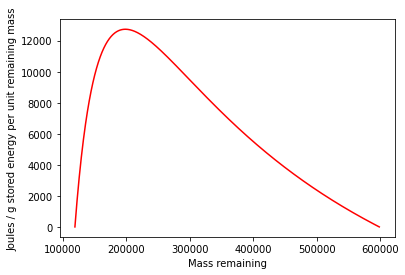

In [11]:
### Now let's plot joules / g for our saturn V second stage


plt.plot(masses_sv, [energy_stored_optimal(m_i_sv, m_f_sv, h_energy_density, m)/(1000.0 * m) for m in masses_sv], 'r-')
plt.xlabel("Mass remaining")
plt.ylabel("Joules / g stored energy per unit remaining mass")


12000 huh?  I have no idea how plausible that is.  If those Joules / g translate 1-to-1 into degrees Kelvin, that would be twice as hot as the surface of the sun.  That's pretty hot.

Inverting our view
================

So far, we've been looking at how much more $\Delta v$ we could get from a fixed amount of fuel by changing the schedule at which we release mass and energy.

What if we look at the problem the other way around : what if we want to look at how little fuel we can get away with for a fixed $\Delta v$ and payload mass?

To do this we'll first write a crude numerical method to help us numerically invert our `delta_v_optimal` and `delta_v_constant` functions that we defined above.

In [12]:
def find_zero(f, low, hi):
    if f(low) > 0:
        return find_zero(lambda x: -f(x), low, hi)
    while f(hi) < 0.0:
        hi = low + 2.0 * (hi - low)
    while abs(hi - low) > 1.0e-6 * abs(max(hi, low)):
        mid = 0.5 * (hi + low)
        if f(mid) < 0.0:
            low = mid
        else:
            hi = mid
    return 0.5 * (hi + low)

def inverse(f, val):
    return find_zero(lambda x: f(x) - val, 0.0, val)

In [13]:
inverse(exp, 1.5)

0.4054650664329529

In [14]:
exp(inverse(exp, 1.5))

1.499999937487184

Text(0, 0.5, 'Fuel required, kg')

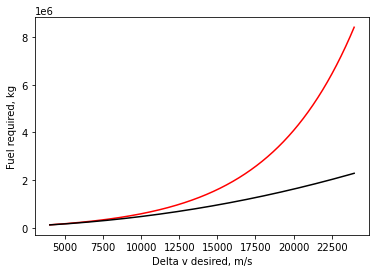

In [15]:
delta_vs = [4000 + 20.0 * i for i in range(1000)]

const_v_e_masses = [inverse(lambda m: deltav_constant(m + m_f_sv, m_f_sv, h_energy_density), v) for v in delta_vs]
opt_v_e_masses = [inverse(lambda m: deltav_optimal(m + m_f_sv, m_f_sv, h_energy_density), v) for v in delta_vs]

plt.plot(delta_vs, const_v_e_masses, 'r-')
plt.plot(delta_vs, opt_v_e_masses, 'k-')

plt.xlabel("Delta v desired, m/s")
plt.ylabel("Fuel required, kg")

Text(0, 0.5, 'Fuel to payload mass ratio, (dimensionless)')

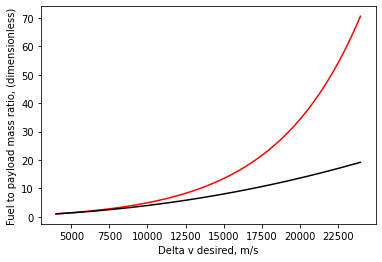

In [16]:
# Or, if you're more interested in fuel to payload mass ratios

delta_vs = [4000 + 20.0 * i for i in range(1000)]

const_v_e_mass_ratios = [m/m_f_sv for m in const_v_e_masses]
opt_v_e_mass_ratios = [m/m_f_sv for m in opt_v_e_masses]

plt.plot(delta_vs, const_v_e_mass_ratios, 'r-')
plt.plot(delta_vs, opt_v_e_mass_ratios, 'k-')

plt.xlabel("Delta v desired, m/s")
plt.ylabel("Fuel to payload mass ratio, (dimensionless)")

As a computer programmer, having been trained to care about the asymptotic efficiency of processes, I naturally find these plots intriguing.  But am I right to do so?

For one thing, asymptotics tend to only matter when analyzing functions of variables along which one expects to scale. And these two functions start to peel away at $\Delta v$ beyond that required for most interplanetary travel within the solar system.

More importantly, though, the stored energy requirements for savings at the more extreme end might be increasingly prohibitive.  Let's analyze them!

Recall that stored energy, when $m_r$ kg of mass remains, can be expressed as

$$ R_e (m_i + m_f - m_r - \frac{m_i m_f}{m_r}) $$

We want to find where the derivative of this over mass remaining reaches zero for $m_i < m_r < m_f$

$$ \frac{d}{dm} \frac{1}{m_r} ( m_i + m_f - m_r - \frac{m_i m_f}{m_r}) = 0 $$

$$ \frac{d}{dm} \frac{m_i + m_f}{m_r} - 1 - \frac{m_i m_f}{m_r^2} = 0 $$

$$ \frac{-m_i - m_f}{m_r^2} + \frac{2 m_i m_f}{m_r^3} = 0 $$

$$ \frac{2 m_i m_f}{m_r} = m_i + m_f $$

$$ m_r = \frac{2 m_i m_f}{m_i + m_f} $$

In [17]:
# So, let's write a method to compute this worst-case point

def mass_of_worst_case_energy(m_i, m_f):
    return (2.0 * m_i * m_f)/(m_i + m_f)

def worst_case_energy_density(m_i, m_f, R_e):
    """ returns answer in Joules / g """
    m = mass_of_worst_case_energy(m_i, m_f)
    return energy_stored_optimal(m_i, m_f, R_e, m) / (1000.0 * m)

In [18]:
# energy_stored_optimal(m_i_sv, m_f_sv, h_energy_density, m)/(1000.0 * m)

# Now let's check it with our Saturn V second stage example

worst_case_energy_density(m_i_sv, m_f_sv, h_energy_density)

12731.58345141062

Text(0, 0.5, 'Worst stored energy density, J/g')

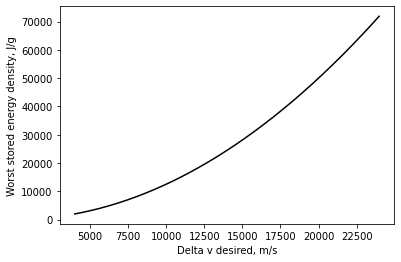

In [19]:
# That checks out, let's plot it!

delta_vs = [4000 + 20.0 * i for i in range(1000)]

densities = [worst_case_energy_density(m + m_f_sv, m_f_sv, h_energy_density) for m in opt_v_e_masses]
plt.plot(delta_vs, densities, 'k-')

plt.xlabel("Delta v desired, m/s")
plt.ylabel("Worst stored energy density, J/g")

Those are some pretty steep energy densities required near the end.  Probably not achievable by merely adding heat to the remaining fuel.


A simpler view
===============

Before we move on to potential practical applications, here's another, and much simpler, way to look at these findings.

Let's go back to high school physics.

Suppose there are $N$ particles, with velocities $v_i$ for $i \in (1 ... N)$ and masses $m_i$ for $i \in (1 ... N)$

The center of mass of this system of particles moves with velocity $v_{cm} = \frac{\sum_{i=1}^N v_i m_i}{\sum_{i=1}^N m_i}$

Denote the velocity of each particle with respect to the center of mass as $v_{rel,i} = v_i - v_{cm}$

The total kinetic energy of the system is

$$ \sum_{i=1}^N \frac{1}{2} m_i v_i^2 = \sum_{i=1}^N \frac{1}{2} m_i (v_{cm} + v_{rel,i})^2 = \sum_{i=1}^N \frac{1}{2} m_i v_{cm}^2 + \sum_{i=1}^N m_i v_{rel,i} v_{cm} + \sum_{i=1}^N \frac{1}{2} m_i v_{rel,i}^2$$

and we can pull terms out that don't depend on $i$ to get

$$ = \frac{1}{2} v_{cm}^2 \sum_{i=1}^N m_i + v_{cm} \sum_{i=1}^N m_i v_{rel,i} + \sum_{i=1}^N \frac{1}{2} m_i v_{rel,i}^2 $$

But we know that $\sum_{i=1}^N m_i v_{rel,i} = 0$, we can define $m_{total} = \sum_{i=1}^N m_i$, and our equation becomes

$$ \frac{1}{2} m_{tot} v_{cm}^2 + \sum_{i=1}^N \frac{1}{2} m_i v_{rel,i} ^2 $$

So the total kinetic energy of the system of particles is the sum of $\frac{1}{2} m_{tot} v_{cm}^2$ and $\sum_{i=1}^N \frac{1}{2} m_i v_{rel,i}^2$

And the total momentum of the system is simply $m_{tot} v_{cm}$

So, what does this mean for rockets?
-------------------------

It means that, if a rocket imparts a total energy, $E$, into expelling exhaust of total mass $m_{tot}$, the way to maximize the total momentum of the exhaust is to minimize the $\sum_{i=1}^N \frac{1}{2} m_i v_{rel,i}^2$ term. The only way to do this is to set $v_{rel,i}=0$ for all $i$, in other words, to impart the same final velocity to all exhuast (in some inertial reference frame).

This is the same conclusion we reached above, but with a much simpler path of reasoning.

What else can we do with this?
---------------------------------------

This approach may allow us to easily work out the relativistic equivalent of the above equations, without resorting to attempting calculus of variations in Minkowski space.

This is potentially important, because even rockets that don't reach relativistic speeds may have relativistic exhaust, especially with various exotic deep space propulsion systems

Is free extra mass useful?
=====================

There are several mechanisms by which an existing spacecraft might encounter a chunk of mass that it can accelerate along with conventional rocket exhaust.

Scheduling how much of this mass to inject per unit fuel consumed can allow an otherwise conventional rocket to more closely approximate the exhaust schedule prescribed by this work.

Because of this, it's worth asking under which conditions it's worthwhile to pick up the extra mass.



Optimal exhuast schedule with extra mass
----------------------------

Recall that the $ \Delta v $ for a rocket with optimal exhaust schedule is

$$ (m_i - m_f) \sqrt{\frac{2 R_e} {m_i m_f}} $$

Suppose we add an extra $ m_{extra} $ of inert mass to the fuel.

Our new $ R_e $ becomes $ \frac{R_e (m_i - m_f)}{m_{extra} + m_i - m_f} $ and our new $ m_i $ becomes $ m_i + m_{extra} $

We can plug these in to get

$$ (m_{extra} + m_i - m_f) \sqrt{\frac{2 R_e (m_i - m_f)} {(m_{extra} + m_i - m_f) (m_i + m_{extra}) m_f}} $$

or

$$ \sqrt{\frac{2 R_e (m_i - m_f) (m_i + m_{extra} - m_f) } {(m_i + m_{extra}) m_f}} $$

which can be re-arranged to

$$ \sqrt{\frac{2 R_e (m_i - m_f) (m_i + m_{extra}) } {(m_i + m_{extra}) m_f} - \frac{2 R_e (m_i - m_f) m_f}{(m_i + m_{extra}) m_f} } $$

or

$$ \sqrt{\frac{2 R_e (m_i - m_f)  } { m_f} - \frac{2 R_e (m_i - m_f)}{m_i + m_{extra}} } $$

and, with apologies for spelling out too many intermediate steps with too many terms,

$$ \sqrt{(2 R_e (m_i - m_f)) ( \frac{1 } { m_f} - \frac{1}{m_i + m_{extra}}) } $$

Since $ \frac{1}{m_i + m_{extra}} $ decreases with increasing $ m_{extra} $ , adding extra mass does always increase the final spacecraft velocity, albeit with diminishing returns, as an infinite value for $ m_{extra} $
gives a final velocity of

$$ \sqrt{(2 R_e (m_i - m_f)) ( \frac{1 } { m_f}) } $$




In [24]:
# Let's try imagining if the 2nd stage of a Saturn V had used an optimal exhaust velocity schedule
# with infinite free extra mass

# recall the following

h_energy_density = 141.8e6 / 9  # 141.8e6 is from wikipedia, dividing by 9 is because we need to carry oxygen
# we need to carry 16 mass for every 2 mass of H2

saturn_v_booster_mass = 2.3e6
saturn_v_stage_2_mass = 0.48e6
saturn_v_stage_3_mass = 0.119e6

m_i_sv = saturn_v_stage_3_mass + saturn_v_stage_2_mass
m_f_sv = saturn_v_stage_3_mass

# then compute

print("With infinite inert extra mass, final velocity is " +
      str(sqrt((2.0 * h_energy_density * (m_i_sv - m_f_sv))/m_f_sv)))

# and compare to


print("With zero inert extra mass, final velocity is " +
      str(sqrt((2.0 * h_energy_density * (m_i_sv - m_f_sv)) * (1.0/m_f_sv - 1.0/m_i_sv))))

With infinite inert extra mass, final velocity is 11274.025077876253
With zero inert extra mass, final velocity is 10092.208262381673


So, hardly a significant change.

But there is some promise here -- perhaps adding inert mass could allow us to follow an optimal exhaust velocity schedule without having to store ludicrous energy densities?


Constant exhaust velocity with extra mass
--------------------------

TODO : fill in later

Optimal exhaust schedule with extra mass, compared to constant exhaust with no extra mass
----------------------

TODO : fill in later


Mass launched to rendezvous point with space gun, engine and fuel by conventional rocket, optimal schedule afterwards
-----------------------

TODO : fill in later

Potential mission profiles
====================

TODO

Relativistic analog
==============

TODO

Interstellar travel
==================

TODO